In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import dlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
import torch 
print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

False
Using device: cpu


In [2]:
%cd /Users/batuhan/yolov5
# %pip install -r requirements.txt

/Users/batuhan/yolov5


In [3]:
!python classify/train.py --model yolov5s-cls.pt --data ../custom_dataset/eye_dataset --epochs 3 --img 128 --cache --batch-size 128

classify/train: model=yolov5s-cls.pt, data=../custom_dataset/eye_dataset, epochs=3, batch_size=128, imgsz=128, nosave=False, cache=ram, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=True, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0 CPU

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: ⚠️ not found, install with `pip install albumentations` (recommended)
Model summary: 149 layers, 4175042 parameters, 4175042 gradients, 10.5 GFLOPs
optimizer: Adam(lr=0.001) with parameter groups 32 weight(decay=0.0), 33 weight(decay=5e-05), 33 bias
Image sizes 128 train, 128 test
Using 7 dataloader workers
Logging results to runs/train-cls/exp8
Starting yolov5s-cls.pt training on ../custom_dataset/eye_dataset data

In [7]:
# import os
# import shutil
# import random

# def split_files(source_dir, train_dir, val_dir, split_ratio=0.8):
#     # Get all files in the source directory
#     files = os.listdir(source_dir)
#     random.shuffle(files)  # Shuffle the files to ensure random selection
    
#     # Calculate the split index
#     split_index = int(len(files) * split_ratio)
    
#     # Split the files into train and validation sets
#     train_files = files[:split_index]
#     val_files = files[split_index:]
    
#     # Create directories if they don't exist
#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(val_dir, exist_ok=True)
    
#     # Copy the files to the respective directories
#     for file in train_files:
#         shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))
    
#     for file in val_files:
#         shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, file))

# # Define source and target directories
# source_yawn_dir = '/Users/batuhan/Desktop/drowsiness/datasets/yawn_dataset/yawn'
# train_yawn_dir = '/Users/batuhan/custom_dataset/yawn_dataset/train/yawn'
# val_yawn_dir = '/Users/batuhan/custom_dataset/yawn_dataset/val/yawn'

# source_no_yawn_dir = '/Users/batuhan/Desktop/drowsiness/datasets/yawn_dataset/no yawn'
# train_no_yawn_dir = '/Users/batuhan/custom_dataset/yawn_dataset/train/no_yawn'
# val_no_yawn_dir = '/Users/batuhan/custom_dataset/yawn_dataset/val/no_yawn'

# # Split and copy files
# split_files(source_yawn_dir, train_yawn_dir, val_yawn_dir)
# split_files(source_no_yawn_dir, train_no_yawn_dir, val_no_yawn_dir)


In [8]:
!python classify/train.py --model yolov5s-cls.pt --data ../custom_dataset/yawn_dataset --epochs 3 --img 128 --cache --batch-size 128

classify/train: model=yolov5s-cls.pt, data=../custom_dataset/yawn_dataset, epochs=3, batch_size=128, imgsz=128, nosave=False, cache=ram, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=True, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0 CPU

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: ⚠️ not found, install with `pip install albumentations` (recommended)
Model summary: 149 layers, 4175042 parameters, 4175042 gradients, 10.5 GFLOPs
optimizer: Adam(lr=0.001) with parameter groups 32 weight(decay=0.0), 33 weight(decay=5e-05), 33 bias
Image sizes 128 train, 128 test
Using 7 dataloader workers
Logging results to runs/train-cls/exp9
Starting yolov5s-cls.pt training on ../custom_dataset/yawn_dataset da

In [4]:
!python classify/predict.py --weights runs/train-cls/exp8/weights/best.pt --img 128 --source ../test_data_comp  --name exp_images


classify/predict: weights=['runs/train-cls/exp8/weights/best.pt'], source=../test_data_comp, data=data/coco128.yaml, imgsz=[128, 128], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp_images, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0 CPU

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
image 1/1246 /Users/batuhan/test_data_comp/s0026_00001_0_0_0_0_0_01.png: 128x128 closed 0.92, open 0.08, 5.2ms
image 2/1246 /Users/batuhan/test_data_comp/s0026_00002_0_0_0_0_0_01.png: 128x128 open 0.54, closed 0.46, 4.4ms
image 3/1246 /Users/batuhan/test_data_comp/s0026_00003_0_0_0_0_0_01.png: 128x128 open 0.62, closed 0.38, 4.7ms
image 4/1246 /Users/batuhan/test_data_comp/s0026_00004_0_0_0_0_0_01.png: 128x128 closed 0.95, open 0.05, 4.9ms
image 5/1246 /Users/batuhan/test_data_comp/s0026_00005_0_0_0_0_0_01.png: 12

In [4]:
#test mouth image


import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp9/weights/best.pt', autoshape=False)

# Load class names
class_names = ["no_yawn", "yawn"]

# Load Haar cascades for face and mouth detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
mouth_cascade = cv2.CascadeClassifier('/Users/batuhan/Downloads/haarcascade_mouth.xml')

# Function to preprocess the mouth region for YOLOv5
def preprocess_mouth(mouth):
    mouth = cv2.resize(mouth, (128, 128))  # Resize to 128x128 as expected by the model
    mouth = mouth.astype('float32') / 255.0  # Normalize to [0, 1]
    mouth = np.transpose(mouth, (2, 0, 1))  # Change shape to [channels, height, width]
    mouth = np.expand_dims(mouth, axis=0)  # Add batch dimension
    mouth = torch.tensor(mouth)  # Convert to torch tensor
    return mouth

# Load a sample image
sample_image_path = '/Users/batuhan/Desktop/drowsiness/datasets/image.jpeg'  # Replace with the path to your sample image

# Check if the file exists
if not os.path.exists(sample_image_path):
    print(f"Error: File not found at {sample_image_path}")
else:
    image = cv2.imread(sample_image_path)
    if image is None:
        print("Error: Failed to load image")
    else:
        print("Image loaded successfully")

        # Detect faces
        faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        print(f"Detected {len(faces)} faces")

        # Process each detected face
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
            face_roi = image[y:y+h, x:x+w]
            gray_face_roi = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)  # Convert face ROI to grayscale
            mouths = mouth_cascade.detectMultiScale(gray_face_roi, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
            print(f"Detected {len(mouths)} mouths in face region")

            # Sort the mouths by area (width * height) in descending order
            mouths = sorted(mouths, key=lambda mouth: mouth[2] * mouth[3], reverse=True)

            if len(mouths) > 0:
                # Take the largest detected mouth
                ex, ey, ew, eh = mouths[0]
                mouth_roi = face_roi[ey:ey+eh, ex:ex+ew]
                mouth_processed = preprocess_mouth(mouth_roi)
                print(f"Mouth ROI shape: {mouth_roi.shape}")
                print(f"Mouth processed shape: {mouth_processed.shape}")

                # Perform inference using the YOLOv5 model
                with torch.no_grad():
                    results = model(mouth_processed)

                # Process the results
                if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                    conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                    cls = torch.argmax(conf).item()
                    label = class_names[cls]
                    confidence = conf[cls].item()
                    print(f"Detected {label} with confidence {confidence:.2f}")

                    # Draw label and confidence score on the image
                    cv2.putText(image, f"{label} {confidence:.2f}", (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                    cv2.rectangle(image[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
                else:
                    print("Model returned no results or unexpected results format.")

        # Display the image with predictions
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Detected Faces and Mouths')
        plt.axis('off')
        plt.show()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Image loaded successfully
Detected 5 faces
Detected 0 mouths in face region
Detected 0 mouths in face region
Detected 0 mouths in face region
Detected 0 mouths in face region
Detected 6 mouths in face region
Mouth ROI shape: (264, 439, 3)
Mouth processed shape: torch.Size([1, 3, 128, 128])
Detected no_yawn with confidence 0.65


In [5]:
#test mouth live dlib

import cv2
import dlib
import numpy as np
import torch

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp9/weights/best.pt', autoshape=False)

# Load class names
class_names = ["no_yawn", "yawn"]

# Load Dlib's face detector and facial landmark predictor
face_detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/Users/batuhan/Downloads/shape_predictor_68_face_landmarks.dat_2")  # Download this file from http://dlib.net/files/

# Function to preprocess the mouth region for YOLOv5
def preprocess_mouth(mouth):
    mouth = cv2.resize(mouth, (128, 128))  # Resize to 128x128 as expected by the model
    mouth = mouth.astype('float32') / 255.0  # Normalize to [0, 1]
    mouth = np.transpose(mouth, (2, 0, 1))  # Change shape to [channels, height, width]
    mouth = np.expand_dims(mouth, axis=0)  # Add batch dimension
    mouth = torch.tensor(mouth)  # Convert to torch tensor
    return mouth

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)

    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Detect landmarks
        landmarks = predictor(gray, face)
        
        # Get mouth landmarks
        mouth_points = []
        for i in range(48, 68):
            x, y = landmarks.part(i).x, landmarks.part(i).y
            mouth_points.append((x, y))
        
        # Draw mouth landmarks
        for point in mouth_points:
            cv2.circle(frame, point, 2, (0, 255, 0), -1)
        
        # Get mouth ROI
        mouth_rect = cv2.boundingRect(np.array(mouth_points))
        mx, my, mw, mh = mouth_rect
        mouth_roi = frame[my:my + mh, mx:mx + mw]
        
        if mouth_roi.size > 0:
            mouth_processed = preprocess_mouth(mouth_roi)

            # Perform inference using the YOLOv5 model
            with torch.no_grad():
                results = model(mouth_processed)

            # Process the results
            if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = class_names[cls]
                confidence = conf[cls].item()
                print(f"Detected {label} with confidence {confidence:.2f}")

                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (mx, my - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame, (mx, my), (mx + mw, my + mh), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Mouth State Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Detected yawn with confidence 0.51
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.74
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.76
Detected no_yawn with confidence 0.76
Detected no_yawn with confidence 0.74
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.76
Detected no_yawn with confidence 0.75
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.75
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.74
Detected no_yawn with confidence 0.74
Detected no_yawn with confidence 0.71
Detected no_yaw

In [22]:
#test mouth live




import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp9/weights/best.pt', autoshape=False)

# Load class names
class_names = ["no_yawn", "yawn"]

# Load Haar cascades for face and mouth detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('/Users/batuhan/Downloads/haarcascade_mouth.xml')

# Function to preprocess the mouth region for YOLOv5
def preprocess_mouth(mouth):
    mouth = cv2.resize(mouth, (128, 128))  # Resize to 128x128 as expected by the model
    mouth = mouth.astype('float32') / 255.0  # Normalize to [0, 1]
    mouth = np.transpose(mouth, (2, 0, 1))  # Change shape to [channels, height, width]
    mouth = np.expand_dims(mouth, axis=0)  # Add batch dimension
    mouth = torch.tensor(mouth)  # Convert to torch tensor
    return mouth

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        face_roi = frame[y:y+h, x:x+w]
        gray_face_roi = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)  # Convert face ROI to grayscale

        # Detect eyes within the face ROI
        eyes = eye_cascade.detectMultiScale(gray_face_roi, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        eye_areas = []

        for (ex, ey, ew, eh) in eyes:
            # Store the eye area
            eye_areas.append((ex, ey, ew, eh))
            # Draw a rectangle around the eye
            cv2.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

        # Detect mouths within the face ROI
        mouths = mouth_cascade.detectMultiScale(gray_face_roi, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Filter out the mouth regions that overlap with the eyes
        valid_mouths = []
        for (mx, my, mw, mh) in mouths:
            overlap = False
            for (ex, ey, ew, eh) in eye_areas:
                if mx < ex + ew and mx + mw > ex and my < ey + eh and my + mh > ey:
                    overlap = True
                    break
            if not overlap:
                valid_mouths.append((mx, my, mw, mh))

        # Sort the mouths by area (width * height) in descending order
        valid_mouths = sorted(valid_mouths, key=lambda mouth: mouth[2] * mouth[3], reverse=True)

        if len(valid_mouths) > 0:
            # Take the largest detected mouth
            mx, my, mw, mh = valid_mouths[0]
            mouth_roi = face_roi[my:my+mh, mx:mx+mw]
            mouth_processed = preprocess_mouth(mouth_roi)

            # Perform inference using the YOLOv5 model
            with torch.no_grad():
                results = model(mouth_processed)

            # Process the results
            if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = class_names[cls]
                confidence = conf[cls].item()
                print(f"Detected {label} with confidence {confidence:.2f}")

                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (x + mx, y + my - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame[y:y+h, x:x+w], (mx, my), (mx+mw, my+mh), (0, 255, 0), 2)
            else:
                print("Model returned no results or unexpected results format.")

    # Display the frame
    cv2.imshow('Mouth State Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Detected no_yawn with confidence 0.61
Detected no_yawn with confidence 0.67
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.65
Detected no_yawn with confidence 0.65
Detected no_yawn with confidence 0.59
Detected no_yawn with confidence 0.65
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.84
Detected no_yawn with confidence 0.76
Detected no_yawn with confidence 0.83
Detected no_yawn with confidence 0.75
Detected no_yawn with confidence 0.76
Detected no_yawn with confidence 0.77
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.78
Detected no_yawn with confidence 0.81
Detected no_yawn with confidence 0.75
Detected no_yawn with confidence 0.80
Detected no_yawn with confidence 0.79
Detected no_yawn with confidence 0.79
Detected no_yawn with confidence 0.76
Detected no_yawn with confidence 0.84
Detected no_yawn with confidence 0.77
Detected no_yawn with confidence 0.80
Detected no_yawn with confidence 0.78
Detected no_

In [4]:
#test eye image


import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp8/weights/best.pt', autoshape=False)

# Load class names
class_names = ["closed", "open"]

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128 as expected by the model
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.stack([eye, eye, eye], axis=-1)  # Convert to 3 channels
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    eye = torch.tensor(eye)  # Convert to torch tensor
    return eye

# Prompt user to upload the sample image
sample_image_path = '/Users/batuhan/Desktop/drowsiness/datasets/image.jpeg'  # Replace with the path to your sample image

# Check if the file exists
if not os.path.exists(sample_image_path):
    print(f"Error: File not found at {sample_image_path}")
else:
    image = cv2.imread(sample_image_path)
    if image is None:
        print("Error: Failed to load image")
    else:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Image loaded successfully")

        # Detect faces
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        print(f"Detected {len(faces)} faces")

        # Process each detected face
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
            face_roi = gray_image[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(face_roi)
            print(f"Detected {len(eyes)} eyes in face region")

            # Sort the eyes by area (width * height) in descending order
            eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)
            
            # Take the two largest detected eyes
            eyes = eyes[:2]

            for (ex, ey, ew, eh) in eyes:
                eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
                print("Eye ROI shape:", eye_roi.shape)
                eye_processed = preprocess_eye(eye_roi)
                print("Eye processed shape:", eye_processed.shape)

                # Perform inference using the YOLOv5 model
                with torch.no_grad():
                    results = model(eye_processed)

                # Process the results
                if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                    conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                    cls = torch.argmax(conf).item()
                    label = class_names[cls]
                    confidence = conf[cls].item()
                    print(f"Detected {label} with confidence {confidence:.2f}")

                    # Draw label and confidence score on the image
                    cv2.putText(image, f"{label} {confidence:.2f}", (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                    cv2.rectangle(image[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
                else:
                    print("Model returned no results or unexpected results format.")

        # Display the image with predictions
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Detected Faces and Eyes')
        plt.axis('off')
        plt.show()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Image loaded successfully
Detected 5 faces
Detected 0 eyes in face region
Detected 0 eyes in face region
Detected 0 eyes in face region
Detected 0 eyes in face region
Detected 5 eyes in face region
Eye ROI shape: (245, 245)
Eye processed shape: torch.Size([1, 3, 128, 128])
Detected open with confidence 0.93
Eye ROI shape: (188, 188)
Eye processed shape: torch.Size([1, 3, 128, 128])
Detected open with confidence 0.82


In [6]:
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp8/weights/best.pt', autoshape=False)

# Load class names
class_names = ["closed", "open"]

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128 as expected by the model
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.stack([eye, eye, eye], axis=-1)  # Convert to 3 channels
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    eye = torch.tensor(eye)  # Convert to torch tensor
    return eye

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        face_roi = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_roi)

        # Sort the eyes by area (width * height) in descending order
        eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)

        # Take the two largest detected eyes
        eyes = eyes[:2]

        for (ex, ey, ew, eh) in eyes:
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            eye_processed = preprocess_eye(eye_roi)

            with torch.no_grad():  # Ensure no gradients are calculated
                results = model(eye_processed)

            # Process the results
            if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = class_names[cls]
                confidence = conf[cls].item()

                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            else:
                print("Model returned no results or unexpected results format.")

    # Display the frame
    cv2.imshow('Eye State Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()

Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



In [8]:
#live combined works
import os
import cv2
import dlib
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the YOLOv5 models with the best weights
eye_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp8/weights/best.pt', autoshape=False)
mouth_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp9/weights/best.pt', autoshape=False)

# Load class names
eye_class_names = ["closed", "open"]
mouth_class_names = ["no_yawn", "yawn"]

# Load Haar cascades for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# Load Dlib's face detector and facial landmark predictor for mouth detection
predictor = dlib.shape_predictor("/Users/batuhan/Downloads/shape_predictor_68_face_landmarks.dat")

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128 as expected by the model
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.stack([eye, eye, eye], axis=-1)  # Convert to 3 channels
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    eye = torch.tensor(eye)  # Convert to torch tensor
    return eye

# Function to preprocess the mouth region for YOLOv5
def preprocess_mouth(mouth):
    mouth = cv2.resize(mouth, (128, 128))  # Resize to 128x128 as expected by the model
    mouth = mouth.astype('float32') / 255.0  # Normalize to [0, 1]
    mouth = np.transpose(mouth, (2, 0, 1))  # Change shape to [channels, height, width]
    mouth = np.expand_dims(mouth, axis=0)  # Add batch dimension
    mouth = torch.tensor(mouth)  # Convert to torch tensor
    return mouth

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        face_roi = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_roi)

        # Sort the eyes by area (width * height) in descending order
        eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)

        # Take the two largest detected eyes
        eyes = eyes[:2]

        for (ex, ey, ew, eh) in eyes:
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            eye_processed = preprocess_eye(eye_roi)

            with torch.no_grad():  # Ensure no gradients are calculated
                results = model(eye_processed)

            # Process the results
            if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = class_names[cls]
                confidence = conf[cls].item()

                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            else:
                print("Model returned no results or unexpected results format.")

        
        # Detect mouth using Dlib
        dlib_face = dlib.rectangle(int(x), int(y), int(x + w), int(y + h))
        landmarks = predictor(gray_face_roi, dlib_face)

        # Get mouth landmarks
        mouth_points = []
        for i in range(48, 68):
            mx, my = landmarks.part(i).x, landmarks.part(i).y
            mouth_points.append((mx, my))
        
        # Draw mouth landmarks
        for point in mouth_points:
            cv2.circle(frame, point, 2, (0, 255, 0), -1)
        
        # Get mouth ROI
        mouth_rect = cv2.boundingRect(np.array(mouth_points))
        mx, my, mw, mh = mouth_rect
        mouth_roi = frame[my:my + mh, mx:mx + mw]
        
        if mouth_roi.size > 0:
            mouth_processed = preprocess_mouth(mouth_roi)

            # Perform inference using the YOLOv5 mouth model
            with torch.no_grad():
                mouth_results = mouth_model(mouth_processed)

            # Process the results
            if mouth_results is not None and mouth_results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(mouth_results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = mouth_class_names[cls]
                confidence = conf[cls].item()
                print(f"Detected {label} with confidence {confidence:.2f}")

                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (mx, my - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame, (mx, my), (mx + mw, my + mh), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Eye and Mouth State Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU

Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.70
Detected no_yawn with confidence 0.68
Detected no_yawn with confidence 0.64
Detected no_yawn with confidence 0.70
Detected no_yawn with confidence 0.68
Detected no_yawn with confidence 0.71
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.64
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.70
Detected no_yawn with confidence 0.73
Detected no_yawn with confidence 0.63
Detected no_yawn with confidence 0.64
Detected no_yawn with confidence 0.68
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.62
Detected no_yawn with confidence 0.63
Detected no_yawn with confidence 0.66
Detected no_yawn with confidence 0.67
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.64
Detected no_yawn with confidence 0.68
Detected no_yawn with confidence 0.66
Detected no_yawn with confidence 0.66
Detected no_yawn with confidence 0.65
Detected no_

In [1]:
import os
import cv2
import dlib
import numpy as np
import torch
import time

# Load the YOLOv5 models with the best weights
eye_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp8/weights/best.pt', autoshape=False)
mouth_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp9/weights/best.pt', autoshape=False)

# Load class names
eye_class_names = ["closed", "open"]
mouth_class_names = ["no_yawn", "yawn"]

# Load Haar cascades for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load Dlib's face detector and facial landmark predictor for mouth detection
predictor = dlib.shape_predictor("/Users/batuhan/Downloads/shape_predictor_68_face_landmarks.dat")

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128 as expected by the model
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.stack([eye, eye, eye], axis=-1)  # Convert to 3 channels
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    eye = torch.tensor(eye)  # Convert to torch tensor
    return eye

# Function to preprocess the mouth region for YOLOv5
def preprocess_mouth(mouth):
    mouth = cv2.resize(mouth, (128, 128))  # Resize to 128x128 as expected by the model
    mouth = mouth.astype('float32') / 255.0  # Normalize to [0, 1]
    mouth = np.transpose(mouth, (2, 0, 1))  # Change shape to [channels, height, width]
    mouth = np.expand_dims(mouth, axis=0)  # Add batch dimension
    mouth = torch.tensor(mouth)  # Convert to torch tensor
    return mouth

# Track the state of the eyes
eye_closed_start_time = None
eye_closed_duration_threshold = 2.0  # 2 seconds
eye_closed = False

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    current_eye_state = "open"
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        face_roi = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_roi)

        # Sort the eyes by area (width * height) in descending order
        eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)

        # Take the two largest detected eyes
        eyes = eyes[:2]

        for (ex, ey, ew, eh) in eyes:
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            eye_processed = preprocess_eye(eye_roi)

            with torch.no_grad():  # Ensure no gradients are calculated
                results = eye_model(eye_processed)

            # Process the results
            if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = eye_class_names[cls]
                confidence = conf[cls].item()

                if label == "closed":
                    current_eye_state = "closed"

                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            else:
                print("Model returned no results or unexpected results format.")

        
        # Detect mouth using Dlib
        dlib_face = dlib.rectangle(int(x), int(y), int(x + w), int(y + h))
        landmarks = predictor(gray, dlib_face)

        # Get mouth landmarks
        mouth_points = []
        for i in range(48, 68):
            mx, my = landmarks.part(i).x, landmarks.part(i).y
            mouth_points.append((mx, my))
        
        # Draw mouth landmarks
        for point in mouth_points:
            cv2.circle(frame, point, 2, (0, 255, 0), -1)
        
        # Get mouth ROI
        mouth_rect = cv2.boundingRect(np.array(mouth_points))
        mx, my, mw, mh = mouth_rect
        mouth_roi = frame[my:my + mh, mx:mx + mw]
        
        if mouth_roi.size > 0:
            mouth_processed = preprocess_mouth(mouth_roi)

            # Perform inference using the YOLOv5 mouth model
            with torch.no_grad():
                mouth_results = mouth_model(mouth_processed)

            # Process the results
            if mouth_results is not None and mouth_results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(mouth_results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = mouth_class_names[cls]
                confidence = conf[cls].item()
                print(f"Detected {label} with confidence {confidence:.2f}")

                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (mx, my - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame, (mx, my), (mx + mw, my + mh), (0, 255, 0), 2)
            else:
                print("Model returned no results or unexpected results format.")

    # Check if eyes are closed for more than the threshold duration
    if current_eye_state == "closed":
        if eye_closed_start_time is None:
            eye_closed_start_time = time.time()
        else:
            elapsed_time = time.time() - eye_closed_start_time
            if elapsed_time >= eye_closed_duration_threshold:
                eye_closed = True
    else:
        eye_closed_start_time = None
        eye_closed = False

    # Draw a red indicator on the top left if eyes are closed for more than the threshold duration
    if eye_closed:
        cv2.circle(frame, (30, 30), 20, (0, 0, 255), -1)

    # Display the frame
    cv2.imshow('Eye and Mouth State Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Exception: [Errno 2] No such file or directory: 'runs/train-cls/exp8/weights/best.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [3]:
import os
import cv2
import dlib
import numpy as np
import torch

# Load the YOLOv5 models with the best weights
eye_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp8/weights/best.pt', autoshape=False)
mouth_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train-cls/exp9/weights/best.pt', autoshape=False)

# Load class names
eye_class_names = ["closed", "open"]
mouth_class_names = ["no_yawn", "yawn"]

# Load Dlib's face detector and facial landmark predictor for eye and mouth detection
predictor = dlib.shape_predictor("/Users/batuhan/Downloads/shape_predictor_68_face_landmarks.dat")
face_detector = dlib.get_frontal_face_detector()

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128 as expected by the model
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.stack([eye, eye, eye], axis=-1)  # Convert to 3 channels
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    eye = torch.tensor(eye)  # Convert to torch tensor
    return eye

# Function to preprocess the mouth region for YOLOv5
def preprocess_mouth(mouth):
    mouth = cv2.resize(mouth, (128, 128))  # Resize to 128x128 as expected by the model
    mouth = mouth.astype('float32') / 255.0  # Normalize to [0, 1]
    mouth = np.transpose(mouth, (2, 0, 1))  # Change shape to [channels, height, width]
    mouth = np.expand_dims(mouth, axis=0)  # Add batch dimension
    mouth = torch.tensor(mouth)  # Convert to torch tensor
    return mouth

# Function to enlarge the bounding box
def enlarge_bounding_box(x, y, w, h, scale_w, scale_h, image_shape):
    cx, cy = x + w // 2, y + h // 2
    new_w, new_h = int(w * scale_w), int(h * scale_h)
    new_x = max(cx - new_w // 2, 0)
    new_y = max(cy - new_h // 2, 0)
    new_x = min(new_x, image_shape[1] - new_w)
    new_y = min(new_y, image_shape[0] - new_h)
    return new_x, new_y, new_w, new_h

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)

    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Detect landmarks
        landmarks = predictor(gray, face)
        
        # Get eye landmarks
        left_eye_points = []
        right_eye_points = []
        for i in range(36, 42):  # Left eye
            left_eye_points.append((landmarks.part(i).x, landmarks.part(i).y))
        for i in range(42, 48):  # Right eye
            right_eye_points.append((landmarks.part(i).x, landmarks.part(i).y))
        
        # Get eye ROIs
        left_eye_rect = cv2.boundingRect(np.array(left_eye_points))
        right_eye_rect = cv2.boundingRect(np.array(right_eye_points))
        
        for eye_rect in [left_eye_rect, right_eye_rect]:
            ex, ey, ew, eh = eye_rect
            # Enlarge the bounding box by 170% in width and 340% in height
            ex, ey, ew, eh = enlarge_bounding_box(ex, ey, ew, eh, 1.7, 3.4, frame.shape)
            # Further increase the height by 40% and decrease the width by 20%
            ex, ey, ew, eh = enlarge_bounding_box(ex, ey, ew, eh, 0.8, 1.4, frame.shape)
            eye_roi = gray[ey:ey+eh, ex:ex+ew]
            
            if eye_roi.size > 0:
                eye_processed = preprocess_eye(eye_roi)
                
                # Perform inference using the YOLOv5 eye model
                with torch.no_grad():
                    results = eye_model(eye_processed)
                
                # Process the results
                if results is not None and results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                    conf = torch.nn.functional.softmax(results, dim=1)[0]  # Apply softmax to get probabilities
                    cls = torch.argmax(conf).item()
                    label = eye_class_names[cls]
                    confidence = conf[cls].item()
                    
                    # Draw label and confidence score on the image
                    cv2.putText(frame, f"{label} {confidence:.2f}", (ex, ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                    cv2.rectangle(frame, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                else:
                    print("Model returned no results or unexpected results format.")
        
        # Get mouth landmarks
        mouth_points = []
        for i in range(48, 68):
            mouth_points.append((landmarks.part(i).x, landmarks.part(i).y))
        
        # Draw mouth landmarks
        for point in mouth_points:
            cv2.circle(frame, point, 2, (0, 255, 0), -1)
        
        # Get mouth ROI
        mouth_rect = cv2.boundingRect(np.array(mouth_points))
        mx, my, mw, mh = mouth_rect
        mx, my, mw, mh = enlarge_bounding_box(mx, my, mw, mh, 1.3, 1.3, frame.shape)
        mouth_roi = frame[my:my + mh, mx:mx + mw]
        
        if mouth_roi.size > 0:
            mouth_processed = preprocess_mouth(mouth_roi)
            
            # Perform inference using the YOLOv5 mouth model
            with torch.no_grad():
                mouth_results = mouth_model(mouth_processed)
            
            # Process the results
            if mouth_results is not None and mouth_results.size(1) == 2:  # Expecting a tensor of shape [1, 2]
                conf = torch.nn.functional.softmax(mouth_results, dim=1)[0]  # Apply softmax to get probabilities
                cls = torch.argmax(conf).item()
                label = mouth_class_names[cls]
                confidence = conf[cls].item()
                print(f"Detected {label} with confidence {confidence:.2f}")
                
                # Draw label and confidence score on the image
                cv2.putText(frame, f"{label} {confidence:.2f}", (mx, my - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                cv2.rectangle(frame, (mx, my), (mx + mw, my + mh), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Eye and Mouth State Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU

Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Detected no_yawn with confidence 0.59
Detected no_yawn with confidence 0.66
Detected no_yawn with confidence 0.67
Detected no_yawn with confidence 0.69
Detected no_yawn with confidence 0.66
Detected no_yawn with confidence 0.58
Detected no_yawn with confidence 0.61
Detected no_yawn with confidence 0.63
Detected no_yawn with confidence 0.64
Detected no_yawn with confidence 0.67
Detected no_yawn with confidence 0.62
Detected no_yawn with confidence 0.62
Detected no_yawn with confidence 0.62
Detected no_yawn with confidence 0.66
Detected no_yawn with confidence 0.68
Detected no_yawn with confidence 0.68
Detected no_yawn with confidence 0.64
Detected no_yawn with confidence 0.66
Detected no_yawn with confidence 0.72
Detected no_yawn with confidence 0.71
Detected no_yawn with confidence 0.71
Detected no_yawn with confidence 0.65
Detected no_yawn with confidence 0.74
Detected no_yawn with confidence 0.60
Detected no_yawn with confidence 0.68
Detected no_yawn with confidence 0.68
Detected no_

######project until here

In [10]:
data_dir = './datasets'

In [11]:
eye_dataset_path = "/Users/batuhan/Desktop/drowsiness/datasets/mrlEyes_2018_01"
# drowsiness_dataset_path = os.path.join(data_dir, 'mypaperdataset.mp4')
yawn_dataset_path = os.path.join(data_dir, 'yawn_dataset')
yolo_dataset="/Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset"

In [36]:
# def load_all_images(base_folder):
#     images = []
#     for subfolder in sorted(os.listdir(base_folder)):
#         subfolder_path = os.path.join(base_folder, subfolder)
#         if os.path.isdir(subfolder_path):  # Only process directories
#             for filename in os.listdir(subfolder_path):
#                 img_path = os.path.join(subfolder_path, filename)
#                 img = cv2.imread(img_path)
#                 if img is not None:
#                     images.append(img)
#     return images

# def display_images(images, num_images):
#     """Display a given number of images using matplotlib."""
#     if not images:
#         print("No images available to display.")
#         return
    
#     fig, axs = plt.subplots(1, num_images, figsize=(20, 20))
#     for i in range(num_images):
#         axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
#         axs[i].axis('off')
#     plt.show()

# def process_frame(frame):
#     # Process the frame for drowsiness detection (e.g., detect facial landmarks, compute eye aspect ratio)
#     # This function needs to be implemented based on your specific detection algorithm
#     pass

# def detect_drowsiness(video_path):
#     # Open the video file
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         print("Error: Could not open video.")
#         return
    
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         # Process each frame for drowsiness
#         process_frame(frame)
    
#     cap.release()
#     cv2.destroyAllWindows()

# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img_path = os.path.join(folder, filename)
#         try:
#             with Image.open(img_path) as img:
#                 img = img.convert('RGB')  # Ensure images are in RGB format
#                 img = img.resize((128, 128))  # Resize images to consistent size
#                 images.append(np.array(img))
#         except IOError:
#             print(f"Error opening image {filename}")
#     return images

In [1]:
import os
import shutil

# Define the paths
data_dir = '/Users/batuhan/Desktop/drowsiness/datasets/mrlEyes_2018_01'  # Update this to your data directory
train_dir = '/Users/batuhan/Desktop/drowsiness/datasets/eye_dataset/train'
open_dir = os.path.join(train_dir, 'open')
closed_dir = os.path.join(train_dir, 'closed')

# Create output directories if they don't exist
os.makedirs(open_dir, exist_ok=True)
os.makedirs(closed_dir, exist_ok=True)

# Function to parse the label from the filename
def parse_labels(filename):
    parts = filename.split('_')
    eye_state = int(parts[4])  # 5th element from the start
    reflection = int(parts[5])  # 6th element from the start
    return eye_state, reflection

# Traverse subdirectories to load images and labels
for subdir, _, files in os.walk(data_dir):
    if os.path.basename(subdir).startswith('s'):  # Process only subdirectories starting with 's'
        for file in files:
            if file.endswith('.png'):
                eye_state, reflection = parse_labels(file)
                # Discard images with reflections labeled as '2'
                if reflection == 2:
                    continue
                img_path = os.path.join(subdir, file)
                if eye_state == 0:
                    shutil.copy(img_path, closed_dir)
                elif eye_state == 1:
                    shutil.copy(img_path, open_dir)

print("Images have been copied successfully.")


Images have been copied successfully.


In [16]:
import os
import shutil

# Source dataset path
source_dir = '/Users/batuhan/Desktop/drowsiness/datasets/test_eye'

val_dir = os.path.join(source_dir, 'val')

# Destination directories for the validation dataset
val_closed_dir = os.path.join(val_dir, 'closed')
val_open_dir = os.path.join(val_dir, 'open')

# Create destination directories if they don't exist
os.makedirs(val_closed_dir, exist_ok=True)
os.makedirs(val_open_dir, exist_ok=True)

# Function to parse the eye state and reflection from the filename
def parse_labels(filename):
    parts = filename.split('_')
    eye_state = int(parts[4])  # 5th element from the start
    reflection = int(parts[5])  # 6th element from the start
    return eye_state, reflection

# Traverse subdirectories starting with 's' and copy images
for subdir in os.listdir(source_dir):
    if subdir.startswith('s'):
        subdir_path = os.path.join(source_dir, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith('.png'):
                    eye_state, reflection = parse_labels(filename)
                    if reflection == 2:
                        continue  # Skip images with reflection labeled as '2'
                    src_path = os.path.join(subdir_path, filename)
                    if eye_state == 0:
                        dest_path = os.path.join(val_closed_dir, filename)
                    elif eye_state == 1:
                        dest_path = os.path.join(val_open_dir, filename)
                    else:
                        continue  # Skip if the eye state is not 0 or 1

                    shutil.copy(src_path, dest_path)
                    print(f"Copied {src_path} to {dest_path}")

print("Finished copying images.")


Copied /Users/batuhan/Desktop/drowsiness/datasets/test_eye/s0013/s0013_00851_0_0_0_0_0_01.png to /Users/batuhan/Desktop/drowsiness/datasets/test_eye/val/closed/s0013_00851_0_0_0_0_0_01.png
Copied /Users/batuhan/Desktop/drowsiness/datasets/test_eye/s0013/s0013_01899_0_1_0_0_0_01.png to /Users/batuhan/Desktop/drowsiness/datasets/test_eye/val/closed/s0013_01899_0_1_0_0_0_01.png
Copied /Users/batuhan/Desktop/drowsiness/datasets/test_eye/s0013/s0013_03323_0_0_1_0_0_01.png to /Users/batuhan/Desktop/drowsiness/datasets/test_eye/val/open/s0013_03323_0_0_1_0_0_01.png
Copied /Users/batuhan/Desktop/drowsiness/datasets/test_eye/s0013/s0013_03120_0_0_1_0_0_01.png to /Users/batuhan/Desktop/drowsiness/datasets/test_eye/val/open/s0013_03120_0_0_1_0_0_01.png
Copied /Users/batuhan/Desktop/drowsiness/datasets/test_eye/s0013/s0013_01113_0_0_0_0_0_01.png to /Users/batuhan/Desktop/drowsiness/datasets/test_eye/val/closed/s0013_01113_0_0_0_0_0_01.png
Copied /Users/batuhan/Desktop/drowsiness/datasets/test_eye/

In [19]:
import subprocess

train_command = [
    'python', 'train.py',
    '--model', 'yolov5s-cls.pt',
    '--data', '/Users/batuhan/Desktop/drowsiness/datasets/eye_dataset',
    '--epochs', '3',
    '--batch-size', '128',
    '--imgsz', '224',
    '--nosave',
    '--cache', 'ram',
    '--device', '',
    '--workers', '8',
    '--project', 'runs/train-cls',
    '--name', 'exp',
    '--exist-ok',
    '--pretrained', 'True',
    '--optimizer', 'Adam',
    '--lr0', '0.001',
    '--decay', '5e-05',
    '--label-smoothing', '0.1',
    '--cutoff', 'None',
    '--dropout', 'None',
    '--verbose', 'False',
    '--seed', '0',
    '--local_rank', '-1'
]

subprocess.run(train_command)


usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--evolve_population EVOLVE_POPULATION]
                [--resume_evolve RESUME_EVOLVE] [--bucket BUCKET]
                [--cache [CACHE]] [--image-weights] [--device DEVICE]
                [--multi-scale] [--single-cls] [--optimizer {SGD,Adam,AdamW}]
                [--sync-bn] [--workers WORKERS] [--project PROJECT]
                [--name NAME] [--exist-ok] [--quad] [--cos-lr]
                [--label-smoothing LABEL_SMOOTHING] [--patience PATIENCE]
                [--freeze FREEZE [FREEZE ...]] [--save-period SAVE_PERIOD]
                [--seed SEED] [--local_rank LOCAL_RANK] [--entity ENTITY]
                [--upload_dataset [UPLOAD_DATASET]]
                [--bbox_interval BBOX_

CompletedProcess(args=['python', 'train.py', '--model', 'yolov5s-cls.pt', '--data', '/Users/batuhan/Desktop/drowsiness/datasets/eye_dataset', '--epochs', '3', '--batch-size', '128', '--imgsz', '224', '--nosave', '--cache', 'ram', '--device', '', '--workers', '8', '--project', 'runs/train-cls', '--name', 'exp', '--exist-ok', '--pretrained', 'True', '--optimizer', 'Adam', '--lr0', '0.001', '--decay', '5e-05', '--label-smoothing', '0.1', '--cutoff', 'None', '--dropout', 'None', '--verbose', 'False', '--seed', '0', '--local_rank', '-1'], returncode=2)

Images array shape: (17214, 128, 128)
Labels array shape: (17214,)
First 5 labels: [0 0 0 0 0]
First 5 images array values (flattened): [38 40 42 ... 78 78 78]


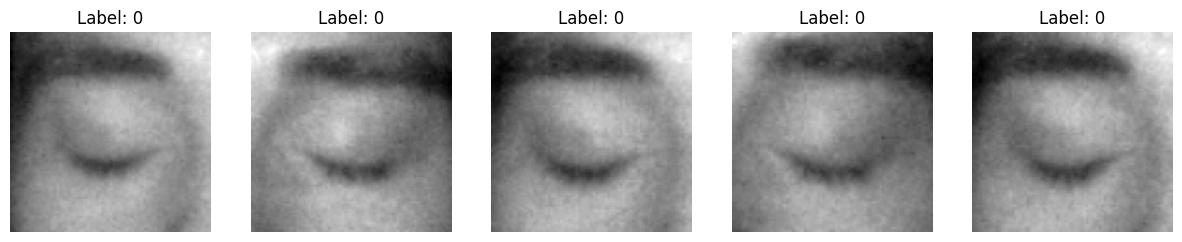

In [5]:
import matplotlib.pyplot as plt
images = np.array(images)
labels = np.array(labels)

# Debug statements to check the contents of images and labels
print("Images array shape:", images.shape)
print("Labels array shape:", labels.shape)
print("First 5 labels:", labels[:5])
print("First 5 images array values (flattened):", images[:5].flatten())

# Function to display images and labels
def show_images(images, labels, num=5):

    fig, axes = plt.subplots(1, num, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')  # Display the i-th image in grayscale
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

# Display the first 5 images and labels
show_images(images, labels, num=5)

In [6]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [84]:
def save_yolo_format(images, labels, subset):
    for i, (img, label) in enumerate(zip(images, labels)):
        img_filename = f'{subset}_{i}.png'
        label_filename = f'{subset}_{i}.txt'
        
        # Save image
        img_path = os.path.join(output_dir, 'images', subset, img_filename)
        cv2.imwrite(img_path, img)
        
        # Save label
        label_path = os.path.join(output_dir, 'labels', subset, label_filename)
        height, width = img.shape
        with open(label_path, 'w') as f:
            # YOLO format: class_id center_x center_y width height (all normalized)
            class_id = label  # 0 for closed, 1 for open
            center_x = 0.5  # Assuming the eye is centered in the 128x128 image
            center_y = 0.5
            bbox_width = 1.0
            bbox_height = 1.0
            f.write(f'{class_id} {center_x} {center_y} {bbox_width} {bbox_height}\n')

# Save training and validation data in YOLO format
save_yolo_format(X_train, y_train, 'train')
save_yolo_format(X_val, y_val, 'val')

In [85]:
# import os
# import subprocess

# def train_yolov5():
#     # Change to the YOLOv5 directory
#     yolov5_dir = '/Users/batuhan/yolov5'  # Update with your actual path to the YOLOv5 directory
#     os.chdir(yolov5_dir)

#     # Define the command for training
#     train_command = [
#         'python', 'train.py',
#         '--img', '128',
#         '--batch', '16',
#         '--epochs', '50',
#         '--data', '/Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset/data.yaml',
#         '--weights', 'yolov5s.pt'
#     ]

#     # Execute the training command
#     subprocess.run(train_command)


    
# train_yolov5()
import os
import subprocess

def train_yolov5(epochs=1):
    # Change to the YOLOv5 directory
    yolov5_dir = '/Users/batuhan/yolov5'  # Update with your actual path to the YOLOv5 directory
    os.chdir(yolov5_dir)

    # Define the command for training
    train_command = [
        'python', 'train.py',
        '--img', '128',
        '--batch', '128',  # Increased batch size
        '--epochs', str(epochs),
        '--data', '/Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset/data.yaml',
        '--weights', 'yolov5n.pt'  # Use the nano version for faster training
    ]

    # Execute the training command
    subprocess.run(train_command)

# Run with 1 epoch to fit the 10-15 minutes training duration
train_yolov5(epochs=3)


train: weights=yolov5n.pt, cfg=, data=/Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=128, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, c

Images array shape: (17214, 128, 128)
Labels array shape: (17214,)
First 5 labels: [0 0 0 0 0]
First 5 images array values (flattened): [38 40 42 ... 78 78 78]


val: data=/Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset/data.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=128, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0 CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
val: Scanning /Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset/labels/val.cache... 3443 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3443/3443 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 108/108 [00:47<00:00,  2.27it/s]
                   all       3443       3443      0.962       0.92      0.975      0.646
                closed       3443       24

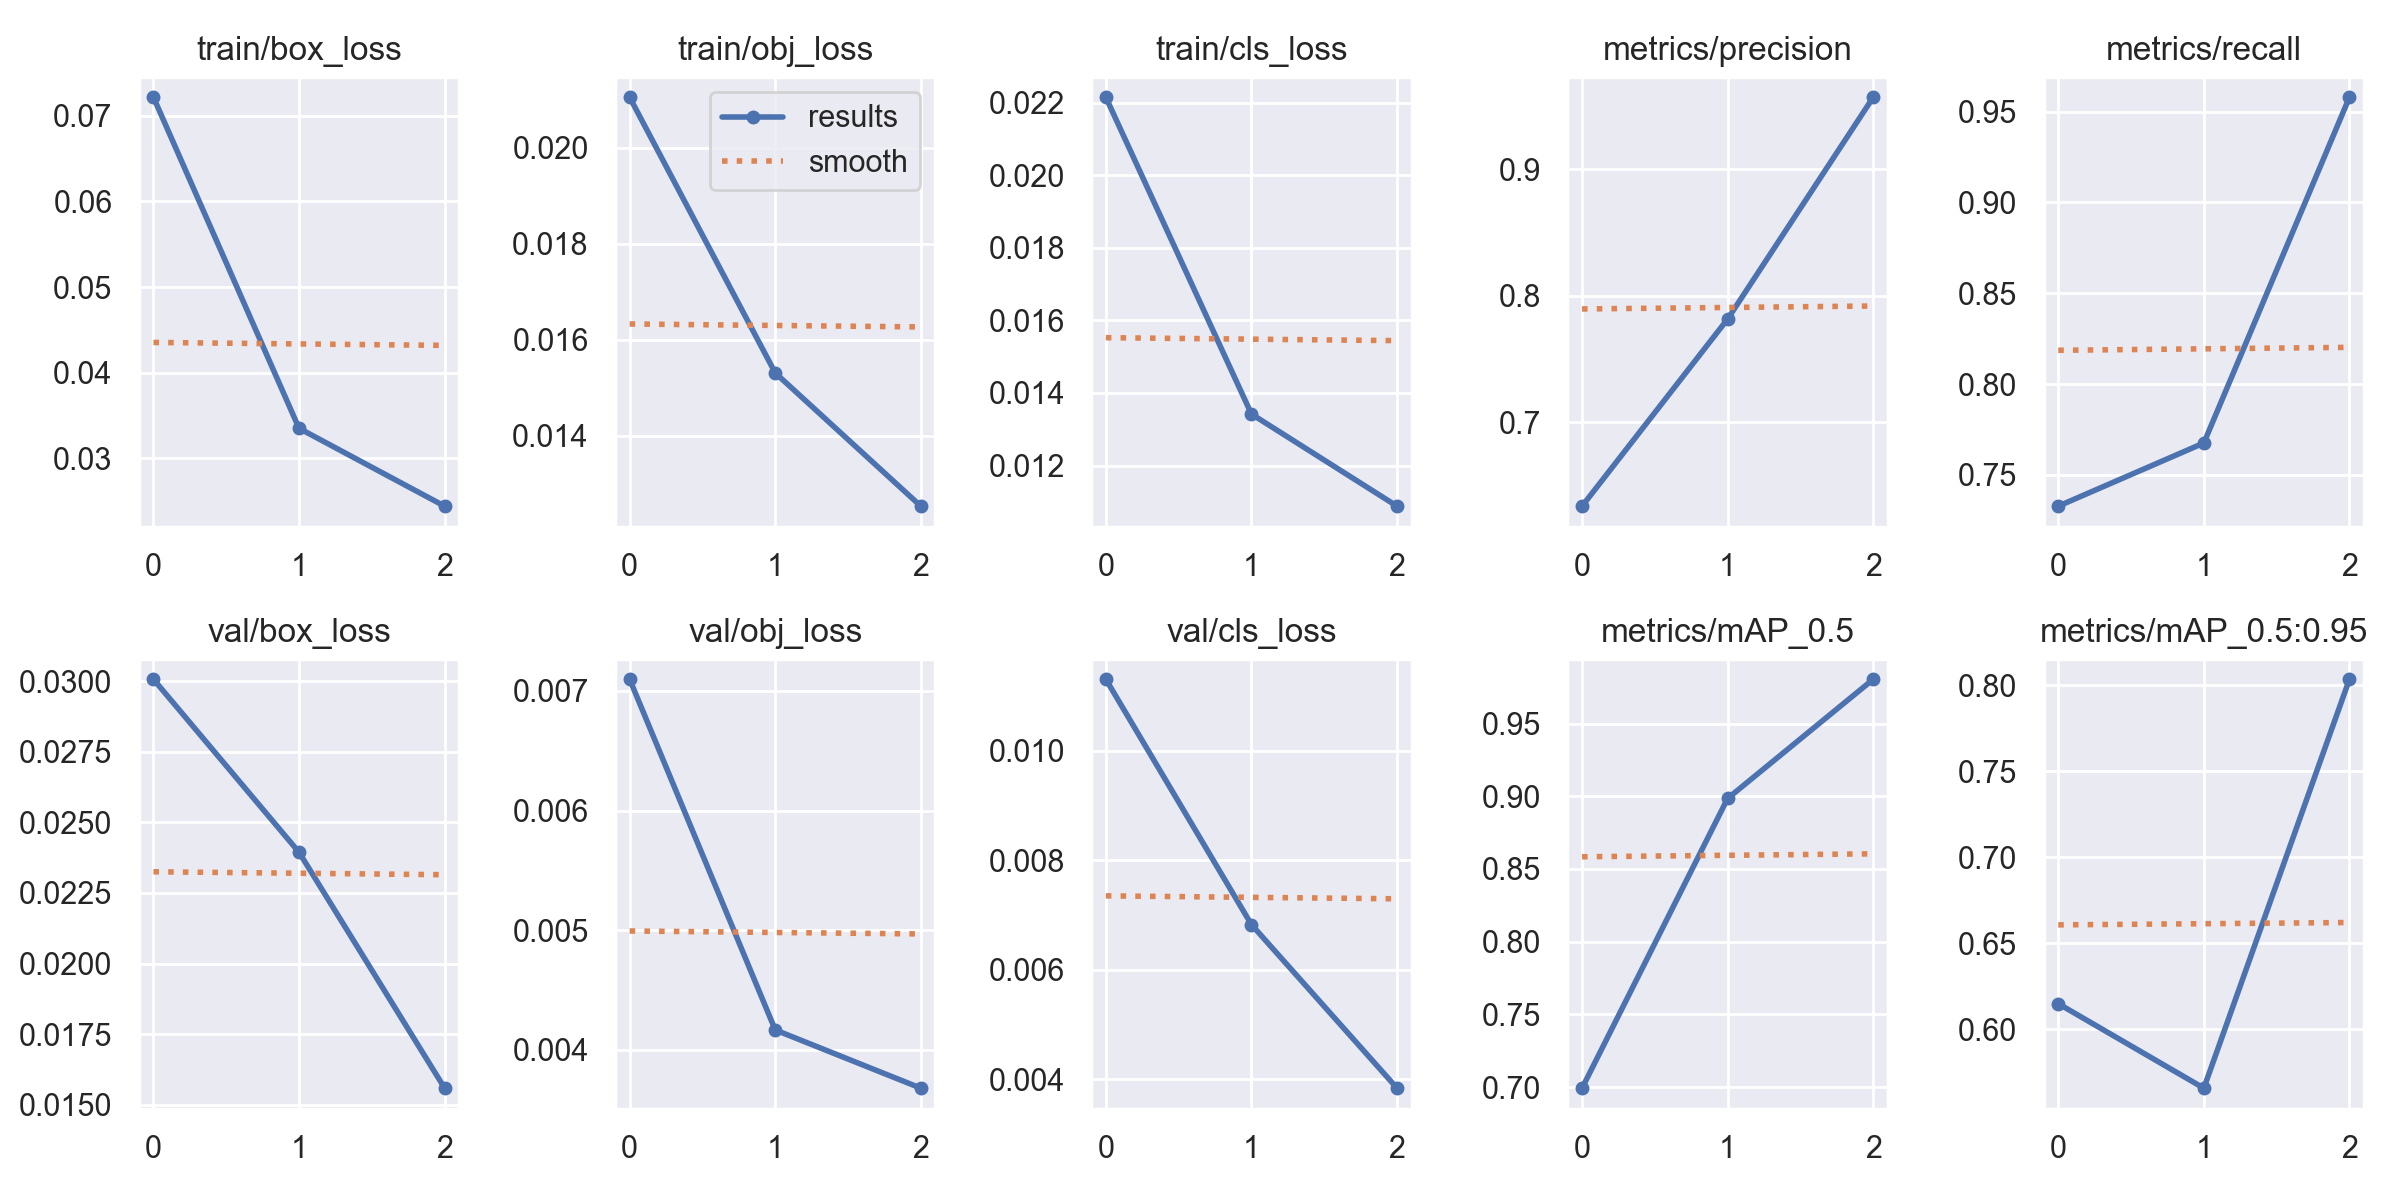

epoch     train/box_loss     train/obj_loss     train/cls_loss  \
0                  0           0.072179           0.021048           0.022146   
1                  1           0.033487           0.015312           0.013418   
2                  2           0.024387           0.012540           0.010880   

   metrics/precision  ...       val/obj_loss       val/cls_loss  \
0            0.63379  ...           0.007098           0.011302   
1            0.78165  ...           0.004166           0.006825   
2            0.95685  ...           0.003679           0.003840   

               x/lr0              x/lr1              x/lr2  
0           0.070278           0.003302           0.003302  
1           0.038088           0.004446           0.004446  
2           0.003698           0.003390           0.003390  

[3 rows x 14 columns]

In [101]:
# Evaluate the trained model
from IPython.display import Image, display
import pandas as pd
import subprocess

# Evaluate the trained model
val_command = [
    'python', 'val.py',
    '--weights', 'runs/train/exp3/weights/best.pt',  # Update this path to the correct directory
    '--data', '/Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset/data.yaml',  # Update with your actual path
    '--img', '128'
]
subprocess.run(val_command)

# Display training results
display(Image(filename='runs/train/exp2/results.png'))

# Load and display detailed metrics
results_df = pd.read_csv('runs/train/exp2/results.csv')
display(results_df.tail())


Image loaded successfully
Eye ROI shape: (245, 245)
<class 'numpy.ndarray'>


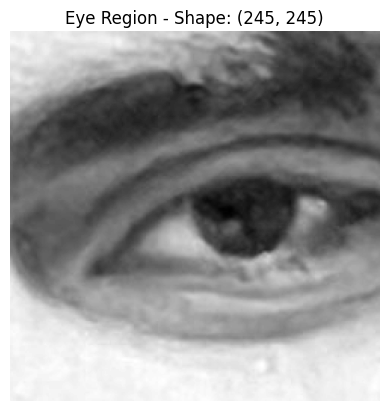

Eye ROI shape: (188, 188)
<class 'numpy.ndarray'>


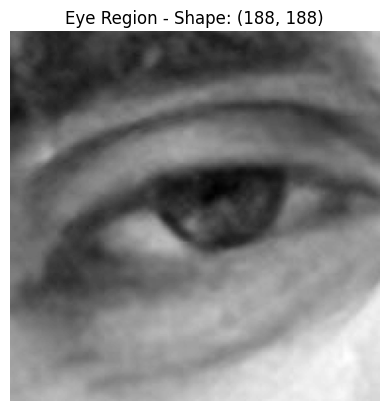

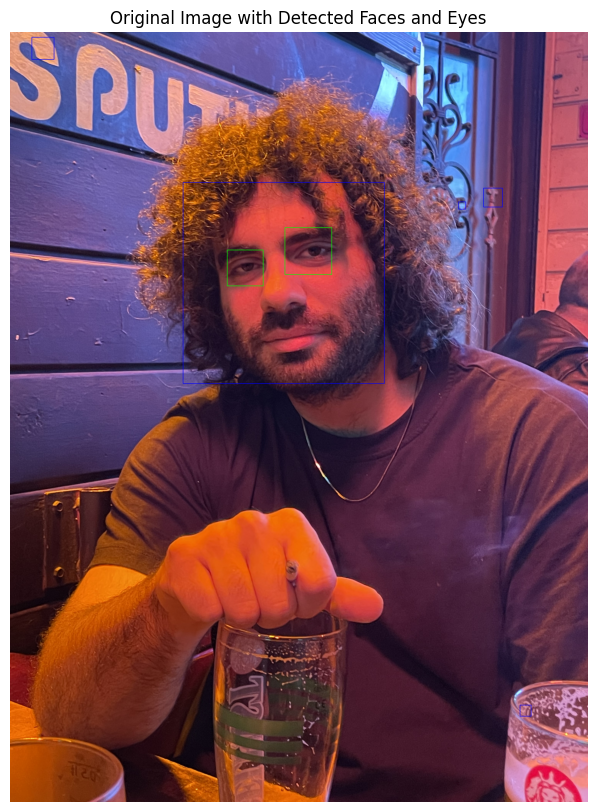

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load a sample image
sample_image_path = '/Users/batuhan/Desktop/drowsiness/datasets/image.jpeg'  # Update with your sample image path
if not os.path.exists(sample_image_path):
    print(f"Error: File not found at {sample_image_path}")
else:
    image = cv2.imread(sample_image_path)
    if image is None:
        print("Error: Failed to load image")
    else:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Image loaded successfully")

        # Detect faces
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Loop over each face detected
        for (x, y, w, h) in faces:
            # Draw a rectangle around the face
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Get the region of interest (ROI) for the face
            face_roi = gray_image[y:y+h, x:x+w]

            # Detect eyes within the face ROI
            eyes = eye_cascade.detectMultiScale(face_roi)

            # Sort the eyes by area (width * height) in descending order
            eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)

            # Take the two largest detected eyes
            eyes = eyes[:2]

            for (ex, ey, ew, eh) in eyes:
                # Draw a rectangle around each eye
                cv2.rectangle(image[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

                # Extract the eye region
                eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
                print("Eye ROI shape:", eye_roi.shape)
                print(type(eye_roi))

                # Show the eye region
                plt.figure()
                plt.imshow(eye_roi, cmap='gray')
                plt.title(f'Eye Region - Shape: {eye_roi.shape}')
                plt.axis('off')
                plt.show()

        # Show the original image with face and eye rectangles
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Detected Faces and Eyes')
        plt.axis('off')
        plt.show()


Image loaded successfully
Eye ROI shape: (245, 245)
Eye ROI type: <class 'numpy.ndarray'>


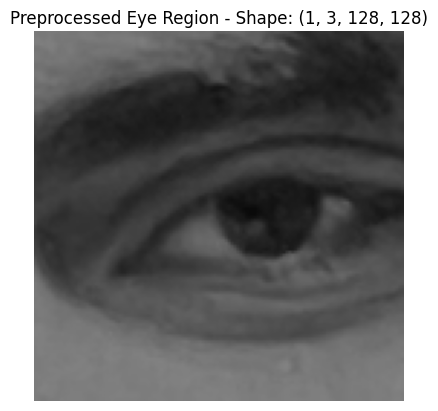

Eye ROI shape: (188, 188)
Eye ROI type: <class 'numpy.ndarray'>


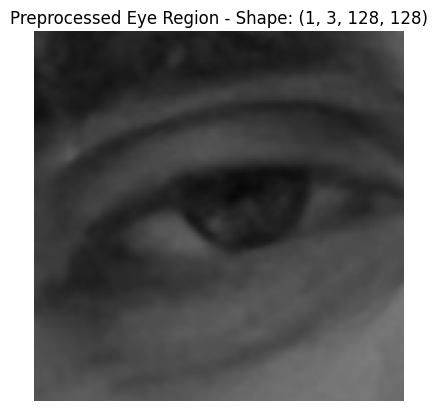

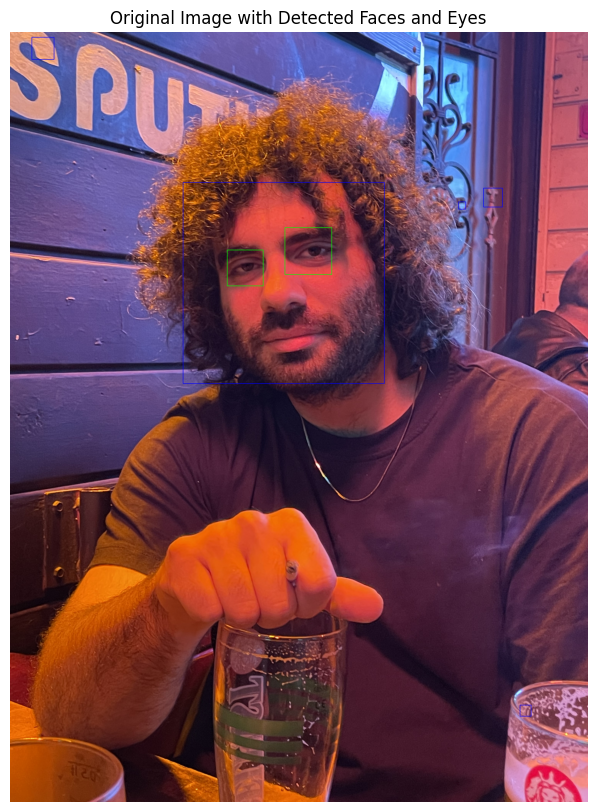

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128
    eye = cv2.cvtColor(eye, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    return eye

# Load a sample image
sample_image_path = '/Users/batuhan/Desktop/drowsiness/datasets/image.jpeg'  # Update with your sample image path
if not os.path.exists(sample_image_path):
    print(f"Error: File not found at {sample_image_path}")
else:
    image = cv2.imread(sample_image_path)
    if image is None:
        print("Error: Failed to load image")
    else:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Image loaded successfully")

        # Detect faces
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Loop over each face detected
        for (x, y, w, h) in faces:
            # Draw a rectangle around the face
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Get the region of interest (ROI) for the face
            face_roi = gray_image[y:y+h, x:x+w]

            # Detect eyes within the face ROI
            eyes = eye_cascade.detectMultiScale(face_roi)

            # Sort the eyes by area (width * height) in descending order
            eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)

            # Take the two largest detected eyes
            eyes = eyes[:2]

            for (ex, ey, ew, eh) in eyes:
                # Draw a rectangle around each eye
                cv2.rectangle(image[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

                # Extract the eye region
                eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
                print("Eye ROI shape:", eye_roi.shape)
                print("Eye ROI type:", type(eye_roi))

                # Preprocess the eye region
                eye_processed = preprocess_eye(eye_roi)

                # Show the preprocessed eye region
                plt.figure()
                plt.imshow(np.transpose(eye_processed[0], (1, 2, 0)), cmap='gray')
                plt.title(f'Preprocessed Eye Region - Shape: {eye_processed.shape}')
                plt.axis('off')
                plt.show()

        # Show the original image with face and eye rectangles
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Detected Faces and Eyes')
        plt.axis('off')
        plt.show()


In [10]:
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/batuhan/yolov5/runs/train/exp3/weights/best.pt', autoshape=True)

# Load class names from data.yaml
class_names = ["closed", "open"]

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128
    eye = cv2.cvtColor(eye, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    return eye

# Function to predict eye state using YOLOv5 model
def predict_eye_state(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Failed to load image from {image_path}")
        return

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Image loaded successfully")

    # Detect faces
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop over each face detected
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Get the region of interest (ROI) for the face
        face_roi = gray_image[y:y+h, x:x+w]

        # Detect eyes within the face ROI
        eyes = eye_cascade.detectMultiScale(face_roi)

        # Sort the eyes by area (width * height) in descending order
        eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)

        # Take the two largest detected eyes
        eyes = eyes[:2]

        for (ex, ey, ew, eh) in eyes:
            # Draw a rectangle around each eye
            cv2.rectangle(image[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

            # Extract the eye region
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            print("Eye ROI shape:", eye_roi.shape)

            # Preprocess the eye region
            eye_processed = preprocess_eye(eye_roi)

            # Convert numpy array to torch tensor
            eye_tensor = torch.from_numpy(eye_processed)
            print("Converted to torch tensor:", eye_tensor.shape)

            # Perform inference using the YOLOv5 model
            with torch.no_grad():  # Ensure no gradients are calculated
                results = model(eye_tensor)
            print("Results:", results)  # Print the results to inspect the structure

            # Process the results
            if results is not None:
                # Convert the results tensor to a numpy array
                results = results.xyxy[0].cpu().numpy()
                print("Processed results:", results)

                for det in results:
                    x1, y1, x2, y2, conf, cls = det

                    # Convert tensor elements to scalars
                    x1_val = int(x1)
                    y1_val = int(y1)
                    x2_val = int(x2)
                    y2_val = int(y2)
                    conf_val = conf
                    cls_val = int(cls)

                    # Get the label
                    if cls_val in range(len(class_names)):
                        label = class_names[cls_val]
                    else:
                        label = f"Unknown({cls_val})"
                        print(f"Warning: class index {cls_val} not found in class_names")

                    # Draw label and confidence score on the image
                    cv2.putText(image, f"{label} {conf_val:.2f}", (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
                    cv2.rectangle(image[y:y+h, x:x+w], (ex + x1_val, ey + y1_val), (ex + x2_val, ey + y2_val), (255, 255, 255), 2)

    # Show the original image with face and eye rectangles
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image with Detected Faces and Eyes')
    plt.axis('off')
    plt.show()

# Example usage
predict_eye_state('/Users/batuhan/Desktop/drowsiness/datasets/image.jpeg')


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


Image loaded successfully
Eye ROI shape: (245, 245)
Converted to torch tensor: torch.Size([1, 3, 128, 128])
Results: tensor([[[ 8.77617e+00, -1.79947e+00,  2.49471e+01,  ...,  2.69971e-04,  3.44145e-01,  6.38623e-01],
         [ 1.60148e+01, -2.31725e+00,  2.08664e+01,  ...,  4.13112e-04,  2.56544e-01,  5.39534e-01],
         [ 2.45690e+01, -3.28799e+00,  1.02130e+01,  ...,  2.72601e-04,  3.12346e-01,  4.39664e-01],
         ...,
         [ 4.61010e+01,  1.15687e+02,  6.97381e+01,  ...,  4.30739e-02,  4.01446e-01,  5.03265e-01],
         [ 6.92094e+01,  1.10057e+02,  7.46422e+01,  ...,  3.19543e-02,  5.43367e-01,  5.07670e-01],
         [ 1.01019e+02,  1.12433e+02,  1.07239e+02,  ...,  9.14632e-03,  7.19952e-01,  5.53353e-01]]])


AttributeError: 'Tensor' object has no attribute 'xyxy'

In [71]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Load the detailed metrics from the results CSV file
# results_df = pd.read_csv('runs/train/exp2/results.csv')

# # Assuming the results CSV has columns 'true_labels' and 'predicted_labels'
# true_labels = results_df['true_labels']
# predicted_labels = results_df['predicted_labels']

# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(true_labels, predicted_labels)

# # Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.names)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()


In [77]:
import cv2
import torch
import numpy as np
import yaml

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp2/weights/best.pt', autoshape=False)

# Load class names from data.yaml
data_yaml_path = '/Users/batuhan/Desktop/drowsiness/datasets/yolo_dataset/data.yaml'
with open(data_yaml_path, 'r') as stream:
    data = yaml.safe_load(stream)
    class_names = data['names']  # Class names

# Path to your image file
image_path = "/Users/batuhan/Desktop/drowsiness/datasets/image.jpeg" # Replace with your image path

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    return eye

# Load and preprocess the image
img = cv2.imread(image_path)
if img is None:
    print("Error: Unable to load image")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    eye_processed = preprocess_eye(img_rgb)

    # Convert numpy array to torch tensor
    eye_tensor = torch.from_numpy(eye_processed)

    # Perform inference using the YOLOv5 model
    with torch.no_grad():
        results = model(eye_tensor)
        print("Results:", results)  # Print the results to inspect the structure

    # Process the results based on the actual structure
    if isinstance(results, list) and len(results) > 0 and isinstance(results[0], torch.Tensor):
        detections = results[0]
        print("Detections:", detections)

        for j in range(len(detections)):
            det = detections[j]
            if len(det) >= 6:
                x1, y1, x2, y2, conf, cls = det[:6]

                # Convert tensor elements to scalars
                x1_val = x1.item()
                y1_val = y1.item()
                x2_val = x2.item()
                y2_val = y2.item()
                conf_val = conf.item()
                cls_val = int(cls.item())  # Convert tensor to Python integer
                
                # Check if cls_val is a valid index in class_names
                if cls_val in range(len(class_names)):
                    label = class_names[cls_val]
                else:
                    label = f"Unknown({cls_val})"
                    print(f"Warning: class index {cls_val} not found in class_names")

                # Draw label on the image
                cv2.putText(img, f"{label} {conf_val:.2f}", (int(x1_val), int(y1_val)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
                cv2.rectangle(img, (int(x1_val), int(y1_val)), (int(x2_val), int(y2_val)), (0, 255, 0), 2)

    # Display the image with annotations
    cv2.imshow('Eye State Detection', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU



Results: [tensor([[[ 8.75978e+00, -3.21452e+00,  1.79561e+01,  ...,  3.83024e-04,  2.55856e-01,  5.22028e-01],
         [ 1.61686e+01, -3.17944e+00,  1.55019e+01,  ...,  7.07511e-04,  2.90372e-01,  3.09315e-01],
         [ 2.38949e+01, -3.47361e+00,  1.14469e+01,  ...,  3.87012e-04,  2.17448e-01,  4.43504e-01],
         ...,
         [ 5.87961e+01,  9.21450e+01,  1.03645e+02,  ...,  3.14355e-02,  8.43196e-01,  1.75710e-01],
         [ 7.28443e+01,  8.72552e+01,  1.18496e+02,  ...,  4.01658e-02,  8.58092e-01,  2.95182e-01],
         [ 9.96690e+01,  1.00936e+02,  1.12415e+02,  ...,  1.20547e-02,  8.04630e-01,  4.47746e-01]]]), [tensor([[[[[ 1.37066, -2.96370,  0.70820,  ..., -7.86703, -1.06762,  0.08817],
           [ 1.15564, -2.91772,  0.50031,  ..., -7.25305, -0.89358, -0.80332],
           [ 1.06389, -3.38084,  0.14003,  ..., -7.85667, -1.28060, -0.22695],
           ...,
           [ 2.08012, -2.47457,  0.43718,  ..., -8.22451, -1.24122, -1.18304],
           [ 1.64468, -2.56543,  0

RuntimeError: a Tensor with 7 elements cannot be converted to Scalar

In [55]:
import cv2
import torch
import numpy as np

# Load the Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the YOLOv5 model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp2/weights/best.pt', autoshape=False)  # Disable AutoShape

# Function to preprocess the eye region for YOLOv5
def preprocess_eye(eye):
    print("Original eye shape:", eye.shape)
    eye = cv2.resize(eye, (128, 128))  # Resize to 128x128
    print("Resized eye shape:", eye.shape)
    eye = cv2.cvtColor(eye, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
    print("Converted to RGB shape:", eye.shape)
    eye = eye.astype('float32') / 255.0  # Normalize to [0, 1]
    print("Normalized eye:", eye.shape)
    eye = np.transpose(eye, (2, 0, 1))  # Change shape to [channels, height, width]
    print("Transposed eye shape:", eye.shape)
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    print("Final preprocessed eye shape:", eye.shape)
    return eye

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print("Frame shape:", frame.shape)
    print("Gray frame shape:", gray.shape)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    print("Faces detected:", faces)

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Get the region of interest (ROI) for the face
        face_roi = gray[y:y+h, x:x+w]
        print("Face ROI shape:", face_roi.shape)

        # Detect eyes within the face ROI
        eyes = eye_cascade.detectMultiScale(face_roi)
        print("Eyes detected:", eyes)

        for (ex, ey, ew, eh) in eyes:
            # Draw a rectangle around each eye
            cv2.rectangle(frame[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
            # Preprocess the eye region
            eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
            print("Eye ROI shape:", eye_roi.shape)
            eye_processed = preprocess_eye(eye_roi)

            # Check the type and shape of eye_processed
            assert isinstance(eye_processed, np.ndarray), f"eye_processed is not a numpy array, but {type(eye_processed)}"
            assert eye_processed.shape == (1, 3, 128, 128), f"eye_processed shape is incorrect: {eye_processed.shape}"
            
            # Convert numpy array to torch tensor
            eye_tensor = torch.from_numpy(eye_processed)
            print("Converted to torch tensor:", eye_tensor.shape)

            # Perform inference using the YOLOv5 model
            with torch.no_grad():  # Ensure no gradients are calculated
                results = model(eye_tensor)
                print("Results:", results)  # Print the results to inspect the structure

            # Process the results based on the actual structure
            if isinstance(results, list) and len(results) > 0:
                detections = results[0]  # Assuming the detections are in the first element of the list
                for det in detections:
                    x1, y1, x2, y2, conf, cls = det
                    label = model.names[int(cls)]
                    
                    # Draw label on the frame
                    cv2.putText(frame, f"{label} {conf:.2f}", (x+ex, y+ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the frame
    cv2.imshow('Eye State Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Using cache found in /Users/batuhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-15 Python-3.10.12 torch-2.3.0 CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


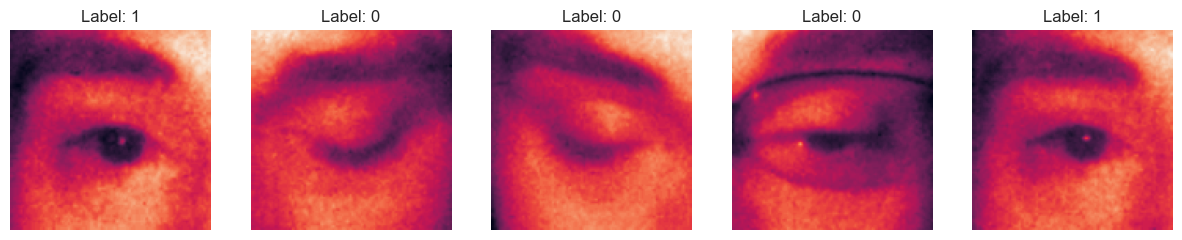

In [58]:
def show_images(images, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])  # Display the i-th image
        ax.title.set_text(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

# Call the function to display the images
show_images(images, labels, num=5)  # Change num to display more or fewer images

In [59]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(128, 128, 3)),  # Define the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [61]:
X_train = np.stack([X_train]*3, axis=-1)  # Replicate grayscale to 3 channels
X_test = np.stack([X_test]*3, axis=-1)

In [62]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [63]:
print("Train images shape:", X_train.shape)
print("Test images shape:", X_test.shape)
print("Data type:", X_train.dtype)

Train images shape: (13771, 128, 128, 3)
Test images shape: (3443, 128, 128, 3)
Data type: float32


In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 62s 349ms/step - accuracy: 0.7821 - loss: 0.5011 - val_accuracy: 0.9477 - val_loss: 0.1518
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 55s 318ms/step - accuracy: 0.9492 - loss: 0.1466 - val_accuracy: 0.9336 - val_loss: 0.1685
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 54s 313ms/step - accuracy: 0.9425 - loss: 0.1525 - val_accuracy: 0.9691 - val_loss: 0.0965
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 54s 313ms/step - accuracy: 0.9611 - loss: 0.1088 - val_accuracy: 0.9648 - val_loss: 0.0942
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 54s 312ms/step - accuracy: 0.9680 - loss: 0.0942 - val_accuracy: 0.9724 - val_loss: 0.0787
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 56s 321ms/step - accuracy: 0.9643 - loss: 0.0894 - val_accuracy: 0.9681 - val_loss: 0.0823
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 56s 324ms/step - accuracy: 0.9703 - loss: 0.0791 - val_accuracy: 0.9757 - val_loss: 0.0690
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 57s 327ms/step - accuracy: 0.9696 - loss: 0

In [66]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9853 - loss: 0.0525
Test accuracy: 98.40%


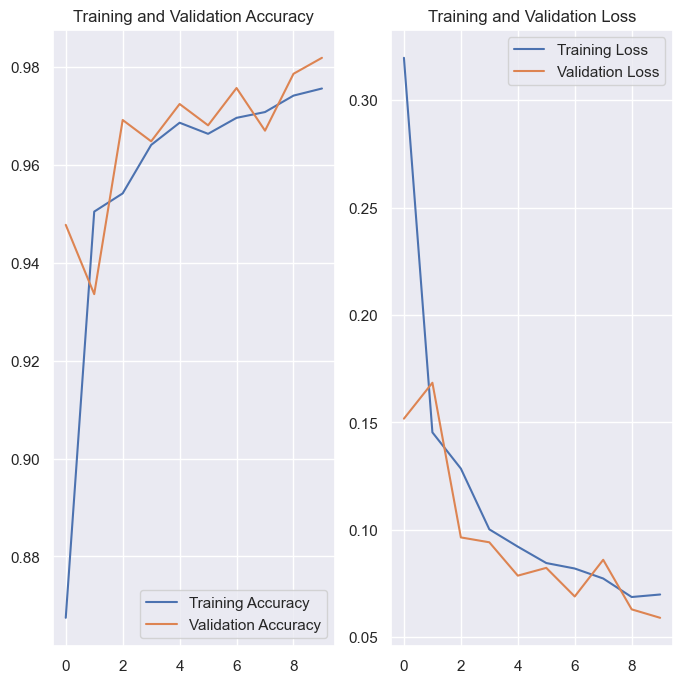

In [67]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [68]:
display(history)

In [69]:
import numpy as np

# Predict probabilities
probabilities = model.predict(X_test)
# Convert probabilities to binary predictions
predictions = (probabilities > 0.5).astype(int)


108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


In [70]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)


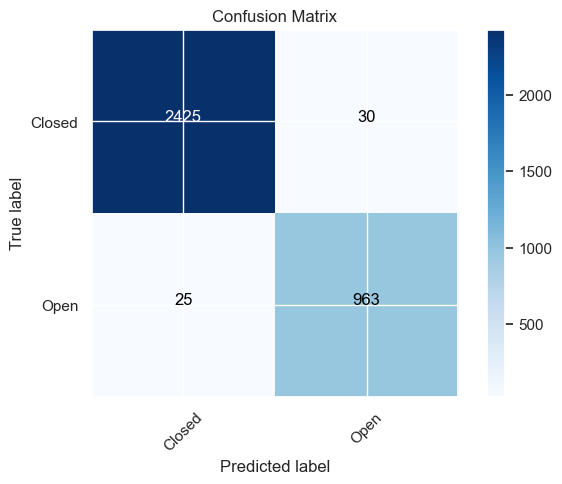

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product  # Import product

sns.set()  # Use seaborn's default style

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Labeling the plot with the appropriate cell values
    threshold = cm.max() / 2.  # Threshold for changing text color for better readability
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Labels are 'Closed' and 'Open'
class_names = ['Closed', 'Open']

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names)


In [76]:
import cv2
import numpy as np
from keras.models import load_model

In [85]:
cap = cv2.VideoCapture(0)  # 0 is usually the default value for the first webcam
if not cap.isOpened():
    print("Cannot open camera")
    exit()

In [86]:
import numpy as np
import cv2

# Load the pre-trained Haar Cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def preprocess_eye(eye):
    """Preprocess the eye image for prediction."""
    eye = cv2.resize(eye, (128, 128))  # Resize eye image to expected input size of the model
    eye = np.stack((eye,)*3, axis=-1)  # Convert grayscale to RGB by stacking
    eye = eye.astype('float32') / 255.0  # Normalize the image
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    return eye

# Path to your video file


# Load the video
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_region = face_gray[ey:ey+eh, ex:ex+ew]
            eye_processed = preprocess_eye(eye_region)

            # Make sure the processed eye shape is correct
            print("Processed eye shape:", eye_processed.shape)  # Debug: Check the shape of processed data

            # Predict using the model
            prediction = model.predict(eye_processed)
            eye_state = 'Open' if prediction > 0.5 else 'Closed'

            # Annotate the frame with the eye state
            cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)
            cv2.putText(frame, eye_state, (x+ex, y+ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the annotated frame
    cv2.imshow('Eye State Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit the playback
        break

cap.release()
cv2.destroyAllWindows()


In [92]:
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, random_state=42
)


In [95]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


# Reshape data to add channel dimension (grayscale images)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_val = X_val.reshape(X_val.shape[0], 128, 128, 1)

# Create data generators
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Prepare generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Define your model, compile it, and then fit it
# model = ... (your model definition)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(train_generator, epochs=10, validation_data=val_generator, steps_per_epoch=len(X_train) // 32, validation_steps=len(X_val) // 32)


In [97]:
print(model.layers[0].input_shape)


AttributeError: 'Conv2D' object has no attribute 'input_shape'

In [98]:


# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),  # Notice the '1' for one channel
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Adjust based on your problem (binary or multi-class)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32
)



Epoch 1/10


/Users/batuhan/miniforge3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


430/430 ━━━━━━━━━━━━━━━━━━━━ 111s 256ms/step - accuracy: 0.8177 - loss: 0.6156 - val_accuracy: 0.9226 - val_loss: 0.1946
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 174us/step - accuracy: 0.9375 - loss: 0.1470 - val_accuracy: 0.8421 - val_loss: 0.3663
Epoch 3/10


2024-05-12 03:30:57.998199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/batuhan/miniforge3/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-12 03:30:58.049133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


430/430 ━━━━━━━━━━━━━━━━━━━━ 103s 238ms/step - accuracy: 0.8814 - loss: 0.3080 - val_accuracy: 0.9296 - val_loss: 0.1898
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.9375 - loss: 0.1280 - val_accuracy: 0.8947 - val_loss: 0.1849
Epoch 5/10


2024-05-12 03:32:41.011242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-12 03:32:41.051691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


430/430 ━━━━━━━━━━━━━━━━━━━━ 101s 234ms/step - accuracy: 0.8920 - loss: 0.2818 - val_accuracy: 0.9445 - val_loss: 0.1525
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 129us/step - accuracy: 0.9375 - loss: 0.2284 - val_accuracy: 0.8421 - val_loss: 0.3172
Epoch 7/10


2024-05-12 03:34:22.550662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-12 03:34:22.596830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


430/430 ━━━━━━━━━━━━━━━━━━━━ 108s 250ms/step - accuracy: 0.8936 - loss: 0.2788 - val_accuracy: 0.9238 - val_loss: 0.1942
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 187us/step - accuracy: 0.8750 - loss: 0.2488 - val_accuracy: 0.8421 - val_loss: 0.1885
Epoch 9/10


2024-05-12 03:36:10.787075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-12 03:36:10.849582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


430/430 ━━━━━━━━━━━━━━━━━━━━ 106s 246ms/step - accuracy: 0.9060 - loss: 0.2389 - val_accuracy: 0.9506 - val_loss: 0.1448
Epoch 10/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 134us/step - accuracy: 1.0000 - loss: 0.1208 - val_accuracy: 0.9474 - val_loss: 0.1668


2024-05-12 03:37:57.347841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-12 03:37:57.390824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [99]:
# Predict classes with the model
predictions = model.predict(X_val)
predicted_classes = (predictions > 0.5).astype(int)


108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step


In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_val is your actual labels and they are binary (0 or 1)
true_classes = y_val

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[2452    3]
 [ 566  422]]


In [101]:
# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)


Accuracy: 0.8347371478361894


In [102]:
from sklearn.metrics import classification_report

# Get precision, recall, f1-score
report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      2455
           1       0.99      0.43      0.60       988

    accuracy                           0.83      3443
   macro avg       0.90      0.71      0.75      3443
weighted avg       0.86      0.83      0.81      3443



In [103]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assume X_val has already been preprocessed similarly to X_train
predictions = model.predict(X_val)
predicted_classes = (predictions > 0.5).astype(int)

# True labels
true_classes = y_val

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

# Detailed classification report
report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)


108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step
Confusion Matrix:
 [[2452    3]
 [ 566  422]]
Accuracy: 0.8347371478361894
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      2455
           1       0.99      0.43      0.60       988

    accuracy                           0.83      3443
   macro avg       0.90      0.71      0.75      3443
weighted avg       0.86      0.83      0.81      3443



In [110]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


print("Model expects input shape:", model.input_shape)

def preprocess_eye(eye):
    """Preprocess the eye image for prediction."""
    eye = cv2.resize(eye, (128, 128))  # Resize eye image to expected input size of the model
    eye = eye.astype('float32') / 255.0  # Normalize the image
    eye = np.expand_dims(eye, axis=-1)  # Add channel dimension to match model's expectation
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    return eye

cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_gray)
        for (ex, ey, ew, eh) in eyes:
            eye_region = face_gray[ey:ey+eh, ex:ex+ew]
            eye_processed = preprocess_eye(eye_region)
            prediction = model.predict(eye_processed)
            eye_state = 'Open' if prediction > 0.5 else 'Closed'
            cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)
            cv2.putText(frame, eye_state, (x+ex, y+ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    cv2.imshow('Eye State Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Model expects input shape: (None, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/

In [30]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))
eyes = eye_cascade.detectMultiScale(face_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))


In [31]:
# Reduce resolution for face detection
small_frame = cv2.resize(frame, (frame.shape[1] // 2, frame.shape[0] // 2))
gray = cv2.cvtColor(small_frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

# Process at a higher resolution for detected faces
for (x, y, w, h) in faces:
    x, y, w, h = [v * 2 for v in [x, y, w, h]]  # Scale up coordinates for the original resolution
    face_region = frame[y:y+h, x:x+w]
    face_gray = cv2.cvtColor(face_region, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(face_gray, 1.1, 5)


In [82]:
import numpy as np
import cv2

# Load the pre-trained Haar Cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def preprocess_eye(eye):
    """Preprocess the eye image for prediction."""
    eye = cv2.resize(eye, (128, 128))  # Resize eye image to expected input size of the model
    eye = np.stack((eye,)*3, axis=-1)  # Convert grayscale to RGB by stacking
    eye = eye.astype('float32') / 255.0  # Normalize the image
    eye = np.expand_dims(eye, axis=0)  # Add batch dimension
    return eye

# Path to your video file


# Load the video
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_region = face_gray[ey:ey+eh, ex:ex+ew]
            eye_processed = preprocess_eye(eye_region)

            # Make sure the processed eye shape is correct
            print("Processed eye shape:", eye_processed.shape)  # Debug: Check the shape of processed data

            # Predict using the model
            prediction = model.predict(eye_processed)
            eye_state = 'Open' if prediction > 0.5 else 'Closed'

            # Annotate the frame with the eye state
            cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)
            cv2.putText(frame, eye_state, (x+ex, y+ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the annotated frame
    cv2.imshow('Eye State Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit the playback
        break

cap.release()
cv2.destroyAllWindows()


Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Processed eye shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processed ey